In [1]:
902897

902897

### Please select the line below and press __Shift+Enter__

In [2]:
import numpy as np #contains a lot of maths functions that we will use
import pandas as pd # handling data 
from scipy import stats
import matplotlib.pyplot as plt #plotting package
from ipywidgets import interact, interactive, fixed #interactivity

# Problem 1 (25 marks)

Let $\delta t >0$ and let $N \in \mathbb{N}$. We consider stock prices at the following times 
$$ S_0, S_{\delta t}, S_{2 \delta t}, \ldots, S_{N \delta t},$$
where $S_t$ denotes a price of a stock at time $t$.
Assume that the stock evolves in time as follows
$$S_{(n + 1) \delta t } = 
\begin{cases} 
u\cdot S_{n \delta t}& \mbox{ with probability } p_1, \\
d\cdot S_{n \delta t} & \mbox{ with probability } p_2, \\
S_{n \delta t} & \mbox{ with probability } 1-p_1-p_2 \\
\end{cases}$$
for any $n \in \{0, 1, \ldots, N-1\}$, where $u>1$, $d = \frac{1}{u}$ and $0 \leq p_1 + p_2 \leq 1$.

- Write a function __stock_model__ that returns the prices of the stock according to the above model between time $0$ and $T=N\delta t$. It should have the following inputs S0, u, p1, p2, and N. It should return a list of a numpy array of stock prices, that is, $$S_{0}, S_{\delta t}, S_{2 \delta t}, \ldots, S_{N \delta t}.$$
Note that $\delta t$ does not have to be used in this code, however it will play a part in the code below to get $T$. 
- Produce a graph of this stock, your x-axis should represent the time (from $0$ to $T$). Choose some S0, u (e.g. 1.01), p1 and p2, big N (e.g. 1000), small dt (e.g. 0.001).
- Make your plot interactive with respect to probabilities $p_1$ and $p_2$, keep their range in the interval $(0, 0.5]$.

In [3]:
def stock_model(S0, u, p1, p2, N):
    if p1+p2 > 1:
        return ('Sum of probabilities cannot be greater than 1')
    elif u <= 1:
        return ('u must be greater than 1')
    stk_prc = np.zeros(N+1)# one dimensional array of N+1 zeroes
    stk_prc[0] = S0
    d = 1/u
    #for n in range(N):
        #stk_prc[n+1] = np.random.choice([u*stk_prc[n],d*stk_prc[n],stk_prc[n]], p = [p1, p2,1-p1-p2])
        #the way taught during first year on M131, wasn`t sure if I can use it, so...
    multiplier_choice = np.array([u, d, 1])
    probs = np.array([p1, p2, 1-p1-p2])
    multipliers = np.random.choice(multiplier_choice , size = N, p = probs)# generates N values of a random variable 
    #such that it takes multiplier_choice values with probs probabilities
    stk_prc[1:] = S0*np.cumprod(multipliers)#a cumulative product function, [S0,S0*multipliers[0],S0*multipliers[0]*multipliers[1],...]           
    return stk_prc

print(stock_model(100, 1.01, 0.6, 0.2, 30))

[100.         100.         100.         101.         102.01
 103.0301     104.060401   103.0301     103.0301     103.0301
 102.01       103.0301     104.060401   105.10100501 104.060401
 105.10100501 106.15201506 106.15201506 106.15201506 105.10100501
 104.060401   105.10100501 104.060401   105.10100501 106.15201506
 107.21353521 108.28567056 108.28567056 109.36852727 110.46221254
 110.46221254]


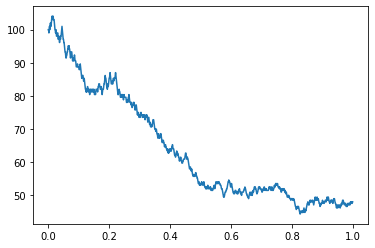

In [4]:
S0, u, N, dt, p1, p2 = 100, 1.01, 1000, 0.001, 0.33, 0.33
T = N*dt
time = np.linspace(0, T, N+1)#x-axis, from 0 to T, N+1 points
stk_prc = stock_model(S0, u, p1, p2, N)
plt.plot(time, stk_prc)# plots graph of stock prices against time
plt.show()

In [5]:
def stock_graph(p1, p2):
    S0, u, N, dt=100, 1.01, 1000, 0.001
    T = N*dt
    time = np.linspace(0, T, N+1)
    stk_prc = stock_model(S0, u, p1, p2, N)
    plt.plot(time, stk_prc)
    plt.show()
    
interactive_plot = interactive(stock_graph, p1 = (0.01, 0.5, 0.01),p2 = (0.01, 0.5, 0.01))
interactive_plot  #range of p1,p2 starts from 0.01 to 0.5 with step 0.01 as interval is closed on the left (0,0.5]

interactive(children=(FloatSlider(value=0.25, description='p1', max=0.5, min=0.01, step=0.01), FloatSlider(val…

# Problem 2 (35 marks)

By using monte-carlo simulation price a __down-and-in-option__ with the strike price $K$  (the underlying asset is the stock). Recall that down-and-in-option is a path dependent option such that its payoff function is given by
$$ f(\{S_t\}_{t=0}^T, K) = \mathbf{1}_{S^* < B} \max\{S_T-K, 0\},$$
where $T>0$ is the maturity,  $S^*$ is the minimum value of the stock in the time interval $[0, T]$, $B>0$ is a barrier that the minimum could hit, and 
$$\mathbf{1}_{S^* < B} = \begin{cases}1 & \mbox{if } S^* < B \mbox{ holds} \\ 0 & \mbox{otherwise} \end{cases}.$$

- Write a function __down_and_in_option__ with the following inputs $S_0$, $K$, $B$, $r$, $\delta t$, $T$. 
- Use the stock_model function from Problem 1 to simulate the stock market. Set 
$$ N = \frac{T}{\delta t}$$
$$
u = \exp\left( 0.2\sqrt{2 \delta t}\right)$$
$$p_1 = \left( \frac{\exp\left( \frac{r \delta t}{2}\right) - \exp\left(-0.2 \sqrt{\frac{ \delta t}{2}}\right)}{ \exp\left(0.2 \sqrt{\frac{ \delta t}{2}}\right)- \exp\left(-0.2 \sqrt{\frac{ \delta t}{2}}\right)}  \right)^2     
$$
$$p_2 =  \left( \frac{ \exp\left(0.2 \sqrt{\frac{ \delta t}{2}}\right)- \exp\left( \frac{r \delta t}{2}\right) }{ \exp\left(0.2 \sqrt{\frac{ \delta t}{2}}\right)- \exp\left(-0.2 \sqrt{\frac{ \delta t}{2}}\right)}  \right)^2     
$$
-  Perform $m$ trials of __down_and_in_option__ function, record the results in a list or a numpy array, and display the average of that list (or numpy array) .
- Test your function with the following inputs $S_0 = \frac{\mbox{your_student_id}}{8000}$, $K = \frac{\mbox{your_student_id}}{ 8000} - 8$, $r = 0.06$, $\delta t = 0.01$, $T=1.0$, $m=10000$. Print the results. 

Note that you have to use quite a big number of trials $m$, the convergence is quite slow, so the error in approximation is of a high order. 

In [6]:
def down_and_in_option(S0, K, B, r, dt, T):
    N = int(T/dt)#T is a float, hence N need to be converted to integer to work in stock_model function
    u = np.exp(0.2*np.sqrt(2*dt))
    p1 = ((np.exp(r*dt/2)-np.exp(-0.2*np.sqrt(dt/2)))/(np.exp(0.2*np.sqrt(dt/2))-np.exp(-0.2*np.sqrt(dt/2))))**2
    p2 = ((np.exp(0.2*np.sqrt(dt/2))-np.exp(r*dt/2))/(np.exp(0.2*np.sqrt(dt/2))-np.exp(-0.2*np.sqrt(dt/2))))**2
    St = stock_model(S0, u, p1, p2, N)# array of (N+1) stock prices starting at times t=0,
                                      # namely S(0),S(dt),S(2dt),...,S(T),1-dimensional array(1 row,N+1 columns)
    S_star = np.min(St)# 'np.min' much faster than 'min' function, min would work as well(1-dimensional array)
    ST = St[-1]#last element of St
    if S_star < B:#conditions for payoff function
        payoff = np.maximum(ST-K, 0)
    else:
        payoff = 0
    C0 = np.exp(-r*T)*payoff# discounted payoff by risk free rate over T
    return C0 

In [7]:
def monte_carlo(S0, K, r, dt, T, m):
    B = int(S0-10)
    C0_values = np.array([down_and_in_option(S0, K, B, r, dt, T) for k in range(m)])#performs function d_a_i_o m-times
    print(C0_values.mean())# displays the average of that array                      and stores results in an array 

S0, K, r, dt, T, m = 902897/8000, 902897/8000-8, 0.06, 0.01, 1.0, 10000
monte_carlo(S0, K, r, dt, T, m)

3.2975343108764306


# Problem 3 (40 marks)

File __stock.csv__ contains prices of a stock in the last year. 
File __options.csv__ contains prices of call and put options on the stock with expiry date over a 5 month period. 


- Your first task is to import the file __stock.csv__ as a pandas dataframe and plot its graph against time (in days).
- Set $\delta t>0$ to be a step size representing one day. This should be used later on in the n-step binomial model. 
- Now find the estimated volatility from the stock values. Given the column of stock prices (obtained from __stock.csv__) $s = \{s_1, s_2, \ldots, s_{251}\}$, the estimated volatility is given by $$ \sqrt{ \frac{\mbox{Var}(y)}{\delta t}},$$ where $$y = \left\{\ln\left(\frac{s_2}{s_1}\right),\ln\left(\frac{s_3}{s_2}\right), \ldots, \ln\left(\frac{s_{251}}{s_{250}}\right) \right\}$$ and $\mbox{Var}(x) = \frac{1}{n} \sum_{k=1}^n \left(x_i - \frac{1}{n}\sum_{k=1}^n x_i \right)^2$ stands for the variance of $x = \{x_1, x_2, \ldots, x_n\}$.
- Next import the file __options.csv__ as a pandas dataframe, it should contain four columns  'strike price', 'call price', 'put price' and 'S0'.
- By using put-call parity find the risk-free rate r for each option from __options.csv__ . Note that here r is a function of time. Add it as a new column to your dataframe (the one obtained from importing __options.csv__). Also define r\_mean to be the average of this column. 
- Use n-step binomial model to obtain the price of a call option, and add the prices as a 'binomial call prices' column in the dataframe obtained from importing __options.csv__. Use $\delta t$ that you defined earlier and find a suitable n to set the maturity to be 5 months.  Use r\_mean as r-input when producing the results, remember to use the right u parameter (that depends on the volatility and $\delta t$). 
- Produce a plot of call prices from __options.csv__, your x-axis should be the strike price. On the same graph produce a plot of call options  obtained from the binomial model. 

Remember to print your results.

In [8]:
df_stock = pd.read_csv('stock.csv') #imports stock.csv file into DataFrame
df_stock #displays the DataFrame, there are 251 rows x 2 columns, first column represent date of the trading day
         # and second stock price. There were 251 trading days between 2/2/2018 and 1/02/2019

,date,stock price
0,02/02/2018,157.4506
1,05/02/2018,153.5168
2,06/02/2018,159.9326
3,07/02/2018,156.5089
4,08/02/2018,152.2023
...,...,...
246,28/01/2019,155.6324
247,29/01/2019,154.0194
248,30/01/2019,164.5442
249,31/01/2019,165.7291


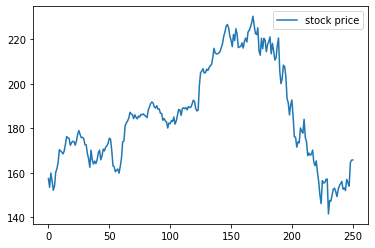

In [9]:
df_stock.plot(y = "stock price")# plots stock price against time(in days) from 0 to 250 
plt.show()

In [10]:
def dt(n):# will be used later, and value will depend on number of steps (n)
    return 1/n

In [11]:
stk_prc = df_stock["stock price"]
n = stk_prc.size
shifted_stock = stk_prc.shift(1)# shifts the index up by 1, giving s=[NaN,s1,s2,s3,...,s250]
y_values = np.log(stk_prc/shifted_stock)# (NaN,log(s2/s1),log(s3/2),...,log(s251/s250)) 
var = np.var(y_values)# no neeed to specify ddof (N-0 degrees of freedom)
volatility = np.sqrt(var/dt(n))

print (volatility,shifted_stock, stk_prc, stk_prc/shifted_stock )

0.3148690576663993 0           NaN
1      157.4506
2      153.5168
3      159.9326
4      156.5089
         ...   
246    157.0862
247    155.6324
248    154.0194
249    164.5442
250    165.7291
Name: stock price, Length: 251, dtype: float64 0      157.4506
1      153.5168
2      159.9326
3      156.5089
4      152.2023
         ...   
246    155.6324
247    154.0194
248    164.5442
249    165.7291
250    165.8088
Name: stock price, Length: 251, dtype: float64 0           NaN
1      0.975016
2      1.041792
3      0.978593
4      0.972483
         ...   
246    0.990745
247    0.989636
248    1.068334
249    1.007201
250    1.000481
Name: stock price, Length: 251, dtype: float64


In [12]:
df_options = pd.read_csv('options.csv') #imports stock.csv file into DataFrame
df_options.head()

,strike price,call price,put price,S0
0,80,90.54,0.05,165.8088
1,85,82.36,0.11,165.8088
2,90,66.35,0.11,165.8088
3,95,72.59,0.15,165.8088
4,100,71.05,0.18,165.8088


In [13]:
K_values = df_options['strike price'] 
C_values = df_options['call price']
P_values = df_options['put price']
S0_values = df_options['S0']
T = 1
t = np.arange(0,T,df_options.size)# t ranges from 0 to T-dt

r_values = (1/(t-T))*np.log((S0_values + P_values - C_values)/K_values)#formula evaluated from S_t+P_t−C_t=Ke^(−r(T−t)),
                                                                       #(t-T)!=0. We assume that S0 to ST is the same as S0, there is no arbitrage

df_options['risk free rate'] = r_values
df_options.head()

,strike price,call price,put price,S0,risk free rate
0,80,90.54,0.05,165.8088,0.060297
1,85,82.36,0.11,165.8088,0.017101
2,90,66.35,0.11,165.8088,-0.101039
3,95,72.59,0.15,165.8088,0.017320
4,100,71.05,0.18,165.8088,0.051938


In [14]:
r_mean = df_options['risk free rate'].mean() # average
print (r_mean)

0.026957207280133906


In [15]:
def binomial_term(S0, K, u, q, n, f, k):# function represents each successive term in the series
    d = 1/u
    binomial_coeff = stats.binom.pmf(k, n, q) 
    ST = S0*u**k*d**(n-k)
    payoff = f(ST, K)
    return binomial_coeff*payoff

In [16]:
def binomial_price(S0, K, volatility, r_mean, dt, n, payoff):# function calculates all terms for k=0 to k=n, 
    k_values = np.arange(0, n+1)                             # adds them up and gives the call_price/put_price, 
    u = np.exp(volatility*np.sqrt(dt(n)))                    # depending on what payoff function we used.
    d = 1/u
    q = (np.exp(r*dt(n))-d)/(u-d)
    binomial_terms = binomial_term(S0, K, u, q, n, payoff, k_values)
    overall_sum = np.sum(binomial_terms)
    return np.exp(-r*dt(n)*n)*overall_sum

In [17]:
def call(ST, K): # payoff function
    return np.maximum(ST-K, 0)

In [18]:
S0 = df_options['S0'][1]
n = df_options.size # stock expire over a 5-month period
payoff = call
binomial_values = np.array([binomial_price(S0, K, volatility, r_mean, dt, n, payoff) for K in K_values])
print(binomial_values)

[90.53593225 85.88335678 81.26857124 76.70075049 72.19305585 67.76159763
 63.42379418 59.19757642 55.10039878 51.14814369 47.35404065 43.72774053
 40.27468468 36.99588266 33.88816341 30.9679852  28.27354688 25.74039642
 23.35396226 21.1930165  19.19137256 17.30206171 15.63749311 14.07948468
 12.64691817 11.38055419 10.16488854  9.14687761  8.15727317  7.31735673
  6.51446341  5.831669    5.17980697  4.63307621  4.10148568  3.6704073
  3.23932892  2.89918679  2.56459382  2.28198768  2.02639879  1.78816272
  1.59606342]


In [19]:
df_options['binomial call prices'] = binomial_values # adds new column to df_options
df_options.head()

,strike price,call price,put price,S0,risk free rate,binomial call prices
0,80,90.54,0.05,165.8088,0.060297,90.535932
1,85,82.36,0.11,165.8088,0.017101,85.883357
2,90,66.35,0.11,165.8088,-0.101039,81.268571
3,95,72.59,0.15,165.8088,0.017320,76.700750
4,100,71.05,0.18,165.8088,0.051938,72.193056


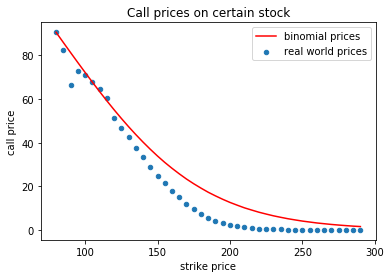

In [20]:
df_options.plot(kind = 'scatter', x = "strike price", y = "call price", label = "real world prices")
plt.plot(K_values, binomial_values, 'r', label = 'binomial prices')
plt.title("Call prices on certain stock")
plt.legend()
plt.show()